In [18]:
import tensorflow
from tensorflow import keras

In [35]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt

In [21]:
batch_size = 128
num_class = 10
epochs = 20

In [22]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [23]:
len(x_train)

60000

In [24]:
x_train[:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [25]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

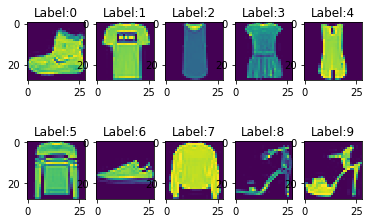

In [26]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title("Label:"+str(i))
    plt.imshow(x_train[i].reshape(28,28), cmap=None)

In [27]:
x_train,x_test = x_train/255.0,x_test/255.0
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation = "softmax")
    
])
#1分類の時はsigmoido, 多分類の時はsoftnaxが

In [29]:
model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#最適化手法　optimizer, Adam, RMSprop,SGD
#loss categorical_crossentropy: 他クラス分類でよく使われる    sparse_categorical_crossentropy：特定の値が大きく、他はゼロに近い

Epoch 1/5
60000/60000 [==============================] - 15s 258us/step - loss: 0.4748 - acc: 0.8311
Epoch 2/5
60000/60000 [==============================] - 15s 243us/step - loss: 0.3602 - acc: 0.8694
Epoch 3/5
60000/60000 [==============================] - 15s 243us/step - loss: 0.3211 - acc: 0.8818
Epoch 4/5
60000/60000 [==============================] - 14s 240us/step - loss: 0.2974 - acc: 0.8906
Epoch 5/5
60000/60000 [==============================] - 14s 239us/step - loss: 0.2787 - acc: 0.8960


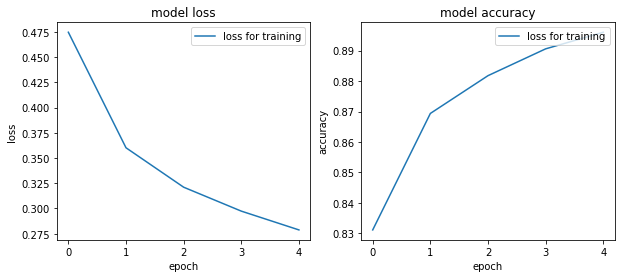

In [30]:
fit = model.fit(x_train,y_train, epochs =5)

fig, (axL, axR) =plt.subplots(ncols=2, figsize=(10,4))

axL.plot(fit.history['loss'],label="loss for training")
axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')
axL.legend(loc='upper right')

axR.plot(fit.history['acc'],label="loss for training")
axR.set_title('model accuracy')
axR.set_xlabel('epoch')
axR.set_ylabel('accuracy')
axR.legend(loc='upper right')


In [31]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 56us/step


[0.3269286756515503, 0.8827]

In [32]:
y_test[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

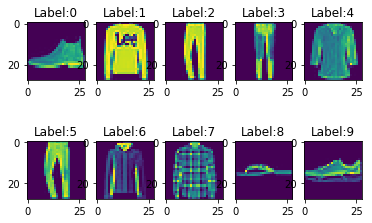

In [33]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title("Label:"+str(i))
    plt.imshow(x_test[i].reshape(28,28), cmap=None)

In [34]:
model.predict(x_test[:10])

array([[2.34787123e-07, 2.39772247e-09, 2.66669353e-08, 3.73597375e-09,
        3.46643425e-08, 1.15734152e-02, 3.11575764e-06, 2.19696425e-02,
        3.28216993e-06, 9.66450214e-01],
       [1.37427516e-04, 2.77106227e-10, 9.93538082e-01, 3.06590877e-08,
        5.67115145e-03, 1.79686210e-09, 6.53424358e-04, 5.75959280e-10,
        1.51968145e-08, 1.28152655e-09],
       [7.70521957e-09, 1.00000000e+00, 1.56767141e-10, 8.66600391e-09,
        2.16759011e-09, 4.77321729e-19, 1.97325101e-10, 2.76679344e-22,
        6.37218617e-14, 1.97456152e-17],
       [7.38598445e-08, 9.99996424e-01, 1.42378278e-08, 3.51475728e-06,
        5.58321460e-08, 1.49066120e-15, 1.30973516e-08, 3.87311580e-19,
        6.31406082e-12, 4.27964311e-14],
       [1.86568052e-01, 4.72508655e-05, 4.71542738e-02, 1.43051920e-02,
        1.61169432e-02, 1.46086363e-03, 7.33654082e-01, 5.13977611e-05,
        5.18506975e-04, 1.23365506e-04],
       [5.17625585e-06, 9.99993443e-01, 1.13947429e-07, 1.50514211e-07,
   